In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("swiggy_all_menus_india.csv")

## 1. Understand the Dataset

In [3]:
#Note down dataset size (rows, columns)
df

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0
...,...,...,...,...,...,...,...,...,...
197425,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,0.0,0
197426,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,0.0,0
197427,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,0.0,0
197428,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,0.0,0


In [4]:
#List all column names and their meaning.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   State            197430 non-null  object 
 1   City             197430 non-null  object 
 2   Restaurant Name  197430 non-null  object 
 3   Location         197430 non-null  object 
 4   Category         197430 non-null  object 
 5   Dish Name        197430 non-null  object 
 6   Price (INR)      197430 non-null  float64
 7   Rating           197430 non-null  float64
 8   Rating Count     197430 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 13.6+ MB


In [5]:
#Identify data types (numeric vs categorical)
print("Numerical Datatypes:")
print(df.describe())
print("\n")
print("Categorical Datatypes:")
print(df.describe(include='O'))

Numerical Datatypes:
         Price (INR)         Rating   Rating Count
count  197430.000000  197430.000000  197430.000000
mean      268.512920       2.613625      28.321805
std       219.338363       2.145706      87.542593
min         0.950000       0.000000       0.000000
25%       139.000000       0.000000       0.000000
50%       229.000000       3.900000       2.000000
75%       329.000000       4.500000      15.000000
max      8000.000000       5.000000     999.000000


Categorical Datatypes:
            State       City Restaurant Name     Location     Category  \
count      197430     197430          197430       197430       197430   
unique         28         28             993          977         4972   
top     Karnataka  Bengaluru      McDonald's  Gomti Nagar  Recommended   
freq        20077      20077           13530         2091        24100   

              Dish Name  
count            197430  
unique            59064  
top     Choco Lava Cake  
freq                

In [6]:
#Check for missing values and duplicates.
print("Missing Values:\n",df.isnull().sum())
print("Missing duplicates:",df.duplicated().sum())

Missing Values:
 State              0
City               0
Restaurant Name    0
Location           0
Category           0
Dish Name          0
Price (INR)        0
Rating             0
Rating Count       0
dtype: int64
Missing duplicates: 6104


## 2. Data Cleaning (Basic)

In [7]:
#Handle missing values (decide: drop, impute, or leave as NA depending on column).
df.isnull().sum()

State              0
City               0
Restaurant Name    0
Location           0
Category           0
Dish Name          0
Price (INR)        0
Rating             0
Rating Count       0
dtype: int64

In [8]:
#Remove exact duplicates.
df=df.drop_duplicates()
print("Missing duplicates:",df.duplicated().sum())

Missing duplicates: 0


In [9]:
#Standardize categorical values (e.g., consistent city/state names).
cat_cols = df.describe(include='O')
for col in cat_cols:
     df[col] = df[col].str.lower().str.strip()
     print(col)

C:\Users\zakia\AppData\Local\Temp\ipykernel_28544\3129348482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower().str.strip()


State
City
Restaurant Name
Location
Category
Dish Name


In [10]:
#Detect unusual/outlier prices (extremely high or zero).
df[df['Price (INR)'] <=0]

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count


In [11]:
df[df['Price (INR)'] >=500]

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
563,karnataka,bengaluru,pizza hut,kanakapura road,recommended,bold bbq veggie thin n crispy,749.00,4.6,7
592,karnataka,bengaluru,pizza hut,kanakapura road,thin n crispy pizzas,bold bbq veggie thin n crispy,749.00,4.6,7
593,karnataka,bengaluru,pizza hut,kanakapura road,thin n crispy pizzas,tandoori paneer thin n crispy,749.00,5.0,6
594,karnataka,bengaluru,pizza hut,kanakapura road,thin n crispy pizzas,mexican fiesta thin n crispy,749.00,3.8,1
595,karnataka,bengaluru,pizza hut,kanakapura road,thin n crispy pizzas,dhabe da keema thin n crispy,749.00,0.0,0
...,...,...,...,...,...,...,...,...,...
197117,sikkim,gangtok,domino's pizza,district court,value meals,ultimate cheese burst premium combo (veg),931.00,0.0,0
197118,sikkim,gangtok,domino's pizza,district court,value meals,meal for 4: veg cheesy pizza,891.00,0.0,0
197119,sikkim,gangtok,domino's pizza,district court,value meals,meal for 4: non veg pizza mania value,523.00,0.0,0
197120,sikkim,gangtok,domino's pizza,district court,value meals,meal for 2: veg paradise & farmhouse,667.14,0.0,0


## 3. Univariate Analysis (One variable at a time)

In [13]:
#Categorical columns

In [12]:
#Count frequency of each unique value.
df.describe(include='O').loc['freq']

State              18349
City               18349
Restaurant Name    12833
Location            2283
Category           23243
Dish Name            318
Name: freq, dtype: object

In [13]:
#Identify top 10 most common states, cities, restaurants, categories, and dishes.
for common in cat_cols:
  known=df[common].value_counts().head(10)
  print(f"Column:{known}")
  print("="*40)

Column:State
karnataka        18349
maharashtra      10467
telangana        10279
delhi            10183
tamil nadu       10042
rajasthan         9801
uttar pradesh     9581
west bengal       9381
punjab            9358
gujarat           8867
Name: count, dtype: int64
Column:City
bengaluru     18349
mumbai        10467
hyderabad     10279
new delhi     10183
chennai       10042
jaipur         9801
lucknow        9581
kolkata        9381
chandigarh     9358
ahmedabad      8867
Name: count, dtype: int64
Column:Restaurant Name
mcdonald's                             12833
kfc                                    12203
burger king                             6576
pizza hut                               6353
domino's pizza                          5326
lunchbox - meals and thalis             4492
baskin robbins - ice cream desserts     4032
faasos - wraps, rolls & shawarma        3112
olio - the wood fired pizzeria          2973
the good bowl                           2575
Name: count, dtype: 

In [14]:
# Look at diversity: are some categories/cities dominating?
print( df["City"].value_counts().head())
print("\n")
print(df["Category"].value_counts().head())


City
bengaluru    18349
mumbai       10467
hyderabad    10279
new delhi    10183
chennai      10042
Name: count, dtype: int64


Category
recommended    23243
desserts        3450
main course     2977
beverages       2615
burgers         2414
Name: count, dtype: int64


In [15]:
#Numerical columns

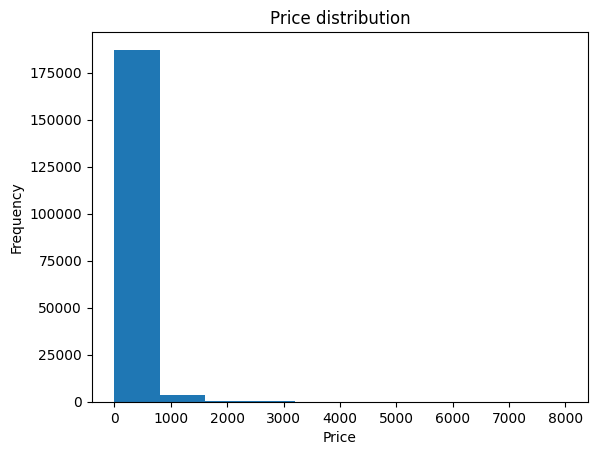

In [16]:
#Distribution of Price (histogram, boxplot).
df["Price (INR)"].plot(kind='hist')
plt.title("Price distribution")
plt.xlabel("Price");

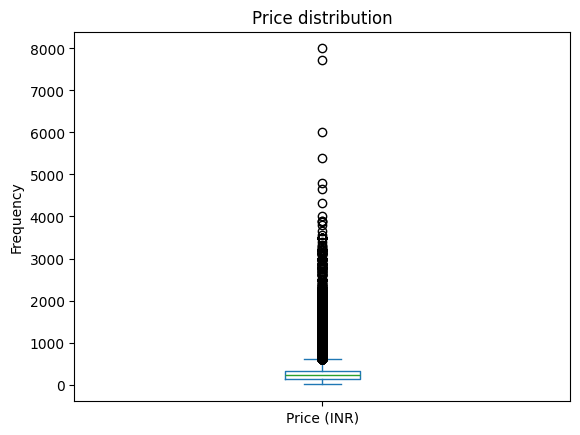

In [17]:
df["Price (INR)"].plot.box()
plt.title("Price distribution")
plt.ylabel("Frequency")
plt.show()

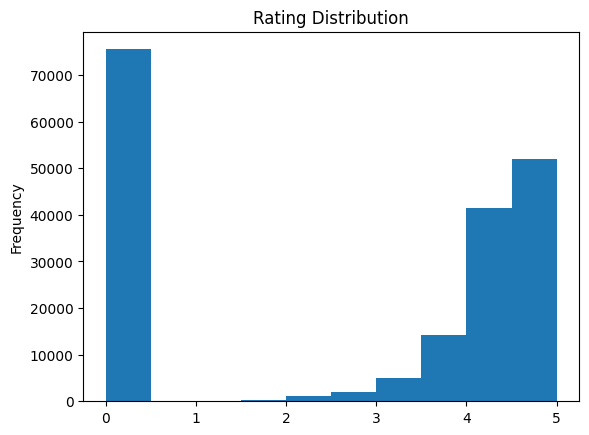

In [18]:
#Distribution of Rating (are they skewed towards 4–5?).
df['Rating'].plot(kind='hist')
plt.title("Rating Distribution")
plt.show()

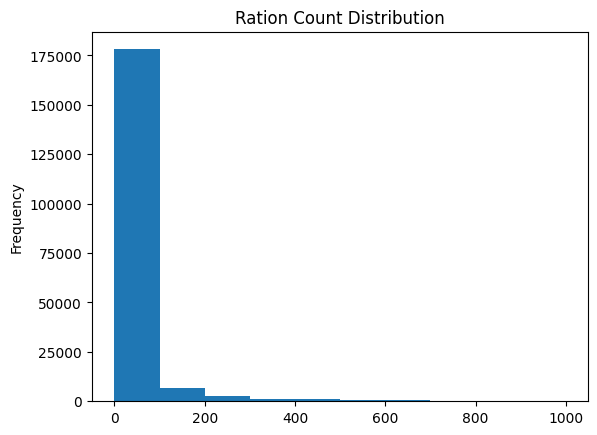

In [19]:
#Distribution of Rating Count (are most dishes unrated or few highly rated?)
df["Rating Count"].plot(kind='hist')
plt.title("Ration Count Distribution")
plt.show()

In [20]:
#Detect outliers in price and rating count.
num_cols=["Price (INR)","Rating Count"]
for col in num_cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR = Q3 - Q1
  df=df[(df[col]>= Q1 - 1.5*IQR )& (df[col] <= Q3+1.5*IQR)]

In [21]:
df

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,karnataka,bengaluru,anand sweets & savouries,rajarajeshwari nagar,snack,butter murukku-200gm,133.9,0.0,0
1,karnataka,bengaluru,srinidhi sagar deluxe,kengeri,recommended,badam milk,52.0,4.5,25
4,karnataka,bengaluru,srinidhi sagar deluxe,kengeri,recommended,mix raitha,130.0,0.0,0
5,karnataka,bengaluru,srinidhi sagar deluxe,kengeri,recommended,srinidhi sagar special,312.0,0.0,0
6,karnataka,bengaluru,srinidhi sagar deluxe,kengeri,recommended,garlic naan,98.0,4.0,34
...,...,...,...,...,...,...,...,...,...
197425,sikkim,gangtok,mama's kitchen,gangtok,momos,soya cheese chilli momo,112.0,0.0,0
197426,sikkim,gangtok,mama's kitchen,gangtok,momos,kurkure momo fried,140.0,0.0,0
197427,sikkim,gangtok,mama's kitchen,gangtok,momos,chilli cheese momo,126.0,0.0,0
197428,sikkim,gangtok,mama's kitchen,gangtok,momos,veg momos (8 pc),85.0,0.0,0


## 4. Bivariate Analysis (Two variables together)

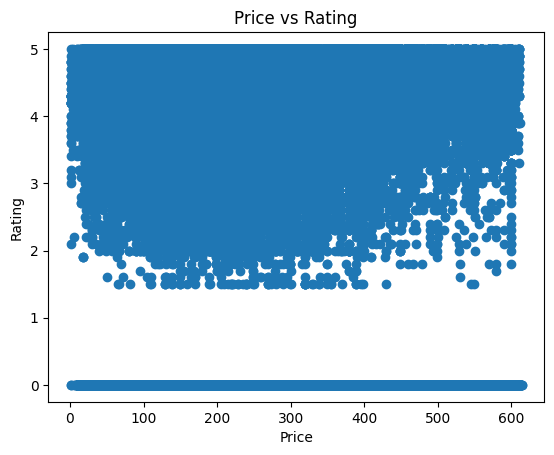

In [22]:
#Does higher price mean higher ratings? Or not related?
plt.scatter(df['Price (INR)'], df['Rating'])
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Price vs Rating")
plt.show()


In [23]:
#Which categories are most expensive? Compare median price of each category.

df.groupby("Category")["Price (INR)"].median().sort_values(ascending=False)


Category
hola mexico                   610.80
chicken indian main course    610.00
premium eggless cake          601.69
patty                         600.00
kashmiri bbq                  600.00
                               ...  
bread items                    15.00
tawa roti                      14.00
cool drinks                    14.00
bevarage                       10.00
gift a guilt free hamper        1.00
Name: Price (INR), Length: 4480, dtype: float64

In [24]:
#Which categories have the best average ratings?
df.groupby("Category")["Rating"].mean().sort_values(ascending=False)

Category
south indian curry items (kulambu)    5.0
tandoori platter                      5.0
tandoori and fry non veg              5.0
spl                                   5.0
summer special beverages              5.0
                                     ... 
black coffee                          0.0
blossoms                              0.0
boba & shakrs                         0.0
boba juice                            0.0
1+1 meals starts at 209               0.0
Name: Rating, Length: 4480, dtype: float64

In [25]:
#Compare average price across different cities.
df.groupby("City")["Price (INR)"].mean().sort_values(ascending=False)


City
panaji         271.823898
shillong       264.189614
mumbai         260.992928
gurgaon        251.021480
lucknow        247.825103
ahmedabad      246.179880
new delhi      246.012102
chennai        243.494653
shimla         243.266871
kolkata        241.866475
hyderabad      241.823674
aizawl         240.283065
bengaluru      240.060484
indore         240.030293
chandigarh     238.853238
dehradun       236.678692
srinagar       236.653608
gangtok        234.297782
patna          233.686334
bhubaneswar    230.118984
guwahati       228.293749
imphal         227.397362
kohima         227.145322
raipur         225.710175
kochi          222.268628
agartala       215.357073
jaipur         213.557600
ranchi         209.549690
Name: Price (INR), dtype: float64

In [26]:
#Identify top 10 most expensive and cheapest cities by average price.
df.groupby("City")["Price (INR)"].mean().sort_values(ascending=False).head(10)

City
panaji       271.823898
shillong     264.189614
mumbai       260.992928
gurgaon      251.021480
lucknow      247.825103
ahmedabad    246.179880
new delhi    246.012102
chennai      243.494653
shimla       243.266871
kolkata      241.866475
Name: Price (INR), dtype: float64

In [27]:
df.groupby("City")["Price (INR)"].mean().sort_values(ascending=False).tail(10)

City
patna          233.686334
bhubaneswar    230.118984
guwahati       228.293749
imphal         227.397362
kohima         227.145322
raipur         225.710175
kochi          222.268628
agartala       215.357073
jaipur         213.557600
ranchi         209.549690
Name: Price (INR), dtype: float64

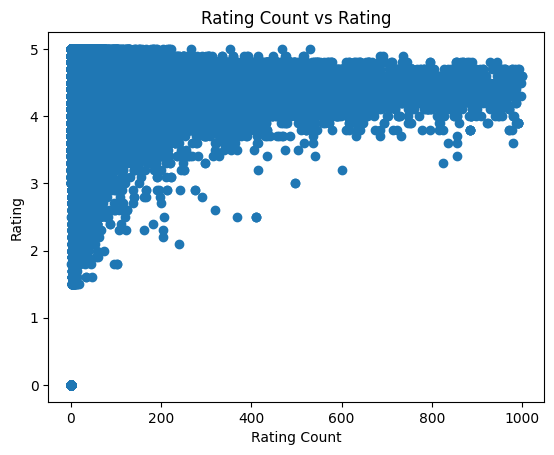

In [36]:
#Are popular dishes (with more reviews) rated higher or lower than average?
plt.scatter(df['Rating Count'], df['Rating'])
plt.xlabel("Rating Count")
plt.ylabel("Rating")
plt.title("Rating Count vs Rating")
plt.show()

#5. Multivariate Analysis (More than two variables)

In [38]:
#Which city–category combinations have the highest rating?
df.groupby(["City", "Category"])["Rating"].mean().sort_values(ascending=False).head(15)


City         Category                          
Chennai      Break Fast                            5.0
Srinagar     South indian curry items (kulambu)    5.0
Kochi        Cake                                  5.0
Chennai      Classic Milkshake                     5.0
             1kg Eggless Cake                      5.0
Gurgaon      Mini Combos                           5.0
Chennai      Classic Tea                           5.0
             Double Scoops, Double Smiles          5.0
Bhubaneswar  Flash Sale - 50% Off                  5.0
Shimla       What?s New                            5.0
Ahmedabad    Nag Panchami Specials                 5.0
Mumbai       Hot Chocolate                         5.0
New Delhi    Cookies                               5.0
Bhubaneswar  99 Store                              5.0
Shillong     Chicken thali                         5.0
Name: Rating, dtype: float64

In [39]:
#See which states and cities dominate in terms of menu items.
df.groupby(["State","City"])["Dish Name"].size().sort_values(ascending=False).head()

State          City     
Karnataka      Bengaluru    20077
Maharashtra    Mumbai       10507
Telangana      Hyderabad    10309
Rajasthan      Jaipur       10286
Uttar Pradesh  Lucknow      10192
Name: Dish Name, dtype: int64

In [40]:
df

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0
...,...,...,...,...,...,...,...,...,...
197425,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,0.0,0
197426,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,0.0,0
197427,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,0.0,0
197428,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,0.0,0


In [41]:
#Compare top restaurants across categories.
df.groupby(["Restaurant Name","Category"])["Rating"].count().sort_values(ascending=False).head()

Restaurant Name                      Category                       
McDonald's                           McSaver Combos (2 Pc Meals)        1825
Burger King                          Exclusive Deals (Save upto 40%)    1717
KFC                                  Recommended                        1700
Pizza Hut                            Recommended                        1383
Baskin Robbins - Ice Cream Desserts  Value Scoops                       1272
Name: Rating, dtype: int64

#6. Case Study Questions to Answer (Objective-based)


In [42]:
#What are the top 10 most expensive items?
df.groupby("Dish Name")["Price (INR)"].mean().sort_values(ascending=False).head(10)

Dish Name
Choley Bhature Classic Combo (for 20)                        8000.0
Special Deluxe Thali Feast (for 15)                          7725.0
Choley Bhature Classic Combo (for 15)                        6000.0
Special Deluxe Thali Feast (for 10)                          5400.0
Party Menu Plan I                                            4799.0
T20 Thunder Combo ( Serves 12) ( Non Veg )                   4652.0
Trophy Celebration Combo ( Serves 12 ) ( Veg)                4328.0
Choley Bhature Classic Combo (for 10)                        4000.0
Mutton Standard Pack                                         3900.0
Thalappakatti Naidu Mutton Biryani Party Bucket (9-10pax)    3884.0
Name: Price (INR), dtype: float64

In [43]:
#Which categories have the highest average/median price?
df. groupby("Category")["Price (INR)"].median()

Category
 Desi Ghee Sweets        600.0
( Chinese)               135.0
(Pasta)                  210.0
(Roll)                   120.0
(Sides)                   82.5
                         ...  
Zerpian                  320.0
[750Gram] Dum Biryani    639.0
cham cham                175.0
make your own combo      155.0
nota                     310.0
Name: Price (INR), Length: 4972, dtype: float64

In [44]:
#Which categories are rated the best on average?
df. groupby("Category")["Rating Count"].median().sort_values(ascending=False)

Category
Special Quick Lunch Parcel       929.0
Special Meal Parcel              791.0
Kolkata Biryani                  713.0
Water& Plate                     688.0
Steam & Fries momos              682.0
                                 ...  
Wraps And Shawarmas And Rolls      0.0
Wraps Special                      0.0
Yogurt's Raita                     0.0
Fried-rice                         0.0
(Roll)                             0.0
Name: Rating Count, Length: 4972, dtype: float64

In [45]:
#Which cities have the most menu items?
df['City'].value_counts().head(10)


City
Bengaluru     20077
Mumbai        10507
Hyderabad     10309
Jaipur        10286
Lucknow       10192
New Delhi     10191
Ahmedabad     10185
Chandigarh    10065
Kolkata       10046
Chennai       10042
Name: count, dtype: int64

In [46]:
#Which cities are most expensive on average?
df.groupby(['City','Dish Name'])['Price (INR)'].mean().sort_values(ascending=False).head(10)


City       Dish Name                                                
Lucknow    Choley Bhature Classic Combo (for 20)                        8000.0
           Special Deluxe Thali Feast (for 15)                          7725.0
           Choley Bhature Classic Combo (for 15)                        6000.0
           Special Deluxe Thali Feast (for 10)                          5400.0
Hyderabad  Party Menu Plan I                                            4799.0
Gurgaon    T20 Thunder Combo ( Serves 12) ( Non Veg )                   4652.0
           Trophy Celebration Combo ( Serves 12 ) ( Veg)                4328.0
Lucknow    Choley Bhature Classic Combo (for 10)                        4000.0
Chennai    Mutton Standard Pack                                         3900.0
           Thalappakatti Naidu Mutton Biryani Party Bucket (9-10pax)    3899.0
Name: Price (INR), dtype: float64

In [47]:
#Which cities have the best-rated dishes?
df.groupby("City")["Rating Count"].mean().sort_values(ascending=False).head()

City
Bhubaneswar    65.147270
Agartala       43.952058
Chennai        42.566720
Shillong       39.377195
Kochi          35.581627
Name: Rating Count, dtype: float64

In [48]:
#Compare average prices and ratings across states.
df.groupby(['State','Price (INR)'])["Rating Count"].mean().sort_values(ascending=False).head()

State    Price (INR)
Tripura  368.57         987.0
Haryana  24.00          972.0
Assam    54.00          963.0
Haryana  17.00          960.0
Kerala   162.00         945.0
Name: Rating Count, dtype: float64

In [49]:
#Which states are “premium” vs “budget” based on pricing?
df.groupby("State")["Price (INR)"].mean().sort_values(ascending=False).head(10)


State
Goa                 306.059525
Uttar Pradesh       305.863388
Telangana           293.113941
Haryana             287.403704
Maharashtra         287.006124
Punjab              279.129726
Delhi               277.615602
Gujarat             276.665294
Meghalaya           275.487507
Himachal Pradesh    273.583138
Name: Price (INR), dtype: float64

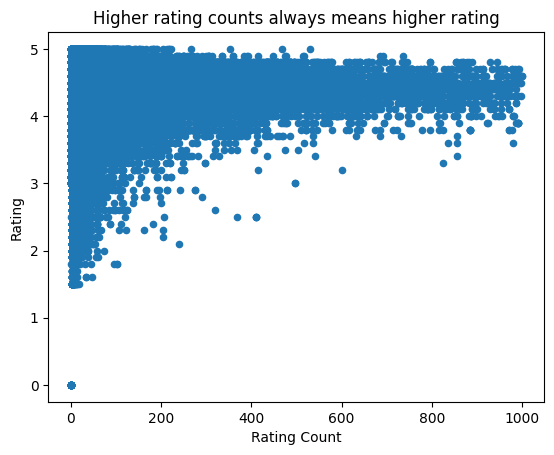

In [50]:
#Do higher rating counts always mean higher ratings?
df.plot(kind='scatter', x='Rating Count', y='Rating')
plt.title("Higher rating counts always means higher rating")
plt.show()


In [51]:
#Which category is most popular in terms of rating counts?
df.groupby("Category")["Rating Count"].mean().sort_values(ascending=False).head()

Category
Special Quick Lunch Parcel    929.0
Special Meal Parcel           791.0
Kolkata Biryani               713.0
Water& Plate                  688.0
Steam & Fries momos           682.0
Name: Rating Count, dtype: float64

In [52]:
#Which restaurants have the largest menus?
df["Restaurant Name"].value_counts().head()

Restaurant Name
McDonald's        13530
KFC               12961
Burger King        7116
Pizza Hut          6529
Domino's Pizza     5492
Name: count, dtype: int64

In [53]:
#Which restaurants are known for highly rated dishes?
df.groupby("Restaurant Name")["Rating"].mean().sort_values(ascending=False).head(10)

Restaurant Name
Jagannath Mandir Arna Prasad                 4.750000
Radhey Lal's Parampara Sweets                4.736905
Aryan Family's Delight                       4.642500
Alakapuri                                    4.642045
Hotel Al Reem                                4.637500
Paris Panini - Gourmet Sandwiches & Wraps    4.635294
Natural Ice Cream                            4.633333
Pizza Jalapenia (Uptown)                     4.600000
Panna Sweets & Restaurant                    4.580000
The Chicken Wagon                            4.548571
Name: Rating, dtype: float64

In [65]:
#Which category is most dominant in each city?
df.groupby("City")["Category"].agg(lambda x: x.value_counts().idxmax()).head()


City
Agartala       Recommended
Ahmedabad      Recommended
Aizawl         Recommended
Bengaluru      Recommended
Bhubaneswar    Recommended
Name: Category, dtype: object

In [61]:
#Which city–category pairs have both high prices and high ratings
df_numeric = df[["Price (INR)", "Rating"]]
df_group = df.groupby(["City", "Category"])[df_numeric.columns].mean()

In [62]:
df_group

Price (INR)    Rating
City     Category                                                           
Agartala 5 Course Pizza Feast                           259.607143  2.407143
         99 Store                                       194.352941  2.817647
         ALL DAY LUNCH SPECIAL MEAL BOX (SAVE RS 115)   399.000000  4.340000
         Accompaniment                                   62.000000  4.700000
         Accompaniments                                 191.000000  4.221429
...                                                            ...       ...
Srinagar Wraps And Roll                                 238.000000  1.580000
         Wraps And Shawarmas And Rolls                  415.000000  1.250000
         Wraps n Rolls                                  212.333333  4.700000
         Yogurt's Raita                                 131.000000  0.660000
         Yumburg Deals                                  294.000000  4.100000

[11391 rows x 2 columns]

In [67]:
df

,State,City,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,0.0,0
1,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,0.0,0
...,...,...,...,...,...,...,...,...,...
197425,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Soya cheese chilli momo ...,112.0,0.0,0
197426,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Kurkure momo fried ...,140.0,0.0,0
197427,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Chilli cheese momo,126.0,0.0,0
197428,Sikkim,Gangtok,Mama's Kitchen,Gangtok,Momos,Veg Momos (8 Pc),85.0,0.0,0


# 7. Final Deliverables

In [ ]:
#Summary Report :This report 



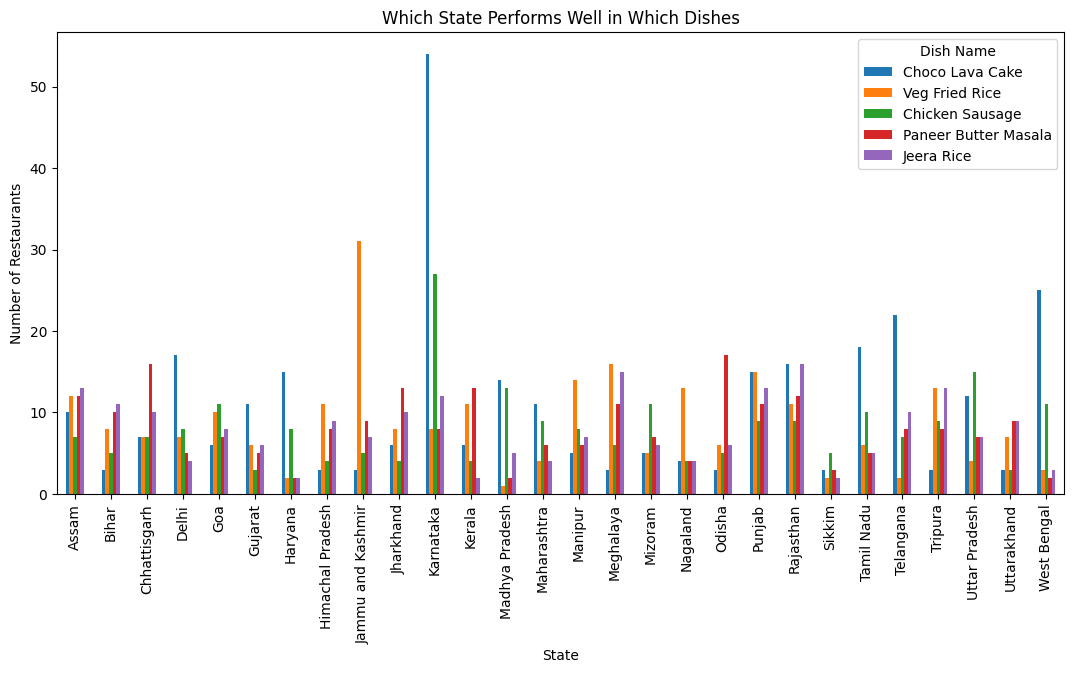

In [79]:
#Bar Chart shows which State does well in which dishes?
dish_state = df.groupby("State")["Dish Name"].value_counts().unstack(fill_value=0)
top_dishes = df["Dish Name"].value_counts().head(5).index
dish_state = dish_state[top_dishes]
dish_state.plot(kind="bar", figsize=(13,6))
plt.title("Which State Performs Well in Which Dishes")
plt.xlabel("State")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=90)
plt.show()

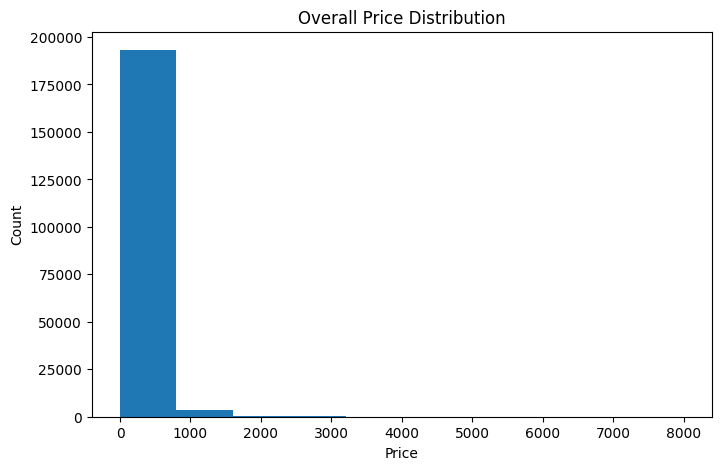

In [105]:
#Histogram shows Overall Price Distribution
plt.figure(figsize=(8,5))
plt.hist(df["Price (INR)"])
plt.title("Overall Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [ ]:
#RECOMMENDATIONS
'''
A) For Restaurants:
-->Mid-range pricing works best
-->Improve low-rated menu items
-->Use popular categories to increase customer engangement
-->If your restaurant is in a less popular category, promote combo meals to attract customers.
-->Put best items at the top of the menu so people see them first.
'''

In [ ]:
'''
B) For Swiggy:
-->Promote cities,categories with high demand but has low supply So increase the supply to attract
-->High-rating categories (like Desserts, Biryani) can be promoted more during weekends.
-->If a city has high orders but has low average price So small delivery fee increase may not hurt demand
-->If a user orders a lot of North Indian food then highlight North Indian restaurants in their feed.
'''